In [1]:
from sdgym import load_dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import xgboost as xgb

In [4]:
%matplotlib inline

In [5]:
dataset_name = 'grid'
data, categorical_columns, ordinal_columns = load_dataset(dataset_name)

In [6]:
data

array([[-2.16592509, -4.00998569],
       [ 3.91250533,  0.45116236],
       [ 2.06962121, -2.23028819],
       ...,
       [ 2.25502541,  0.2227715 ],
       [-0.44888501,  0.25502623],
       [ 1.67915321, -2.13627858]])

In [7]:
data.shape

(10000, 2)

(array([ 18., 142., 425., 702., 525., 192.,  41.,   5.,   1.,   0.,   6.,
         54., 283., 583., 639., 329.,  96.,  22.,   1.,   0.,   2.,  15.,
        150., 409., 653., 502., 186.,  40.,   3.,   2.,   0.,  12.,  60.,
        294., 566., 590., 345.,  79.,  17.,   0.,   0.,   7.,  28., 149.,
        454., 692., 491., 150.,  33.,   7.]),
 array([-4.6990399 , -4.5080478 , -4.31705569, -4.12606358, -3.93507148,
        -3.74407937, -3.55308727, -3.36209516, -3.17110306, -2.98011095,
        -2.78911884, -2.59812674, -2.40713463, -2.21614253, -2.02515042,
        -1.83415832, -1.64316621, -1.4521741 , -1.261182  , -1.07018989,
        -0.87919779, -0.68820568, -0.49721358, -0.30622147, -0.11522936,
         0.07576274,  0.26675485,  0.45774695,  0.64873906,  0.83973116,
         1.03072327,  1.22171538,  1.41270748,  1.60369959,  1.79469169,
         1.9856838 ,  2.1766759 ,  2.36766801,  2.55866012,  2.74965222,
         2.94064433,  3.13163643,  3.32262854,  3.51362064,  3.70461275,
 

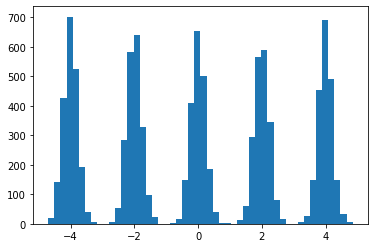

In [8]:
plt.hist(data[:, 0], bins=50)

In [9]:
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [10]:
import logging 

In [11]:
logging.basicConfig(level=logging.INFO)

In [12]:
clf = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [12]:
#kde = KDECopulaNNPdf(rho=0.2, clf=MLPClassifier(random_state=0, max_iter=1000))
#kde = KDECopulaNNPdf(rho=0.2, clf=clf)
kde = KDECopulaNNPdf(use_KDE=False, n_uniform_bins=50)
#kde.max_scale_value = 500

In [13]:

kde = kde.fit(data)

INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.
Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 2.0120723713916235


In [14]:
# clf=svm
kde.score(data)

-30397.23382791874

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   3.,   8.,
         17.,  33.,  50.,  75., 118., 174., 248., 331., 431., 537., 636.,
        724., 790., 819., 827., 788., 725., 633., 537., 431., 336., 245.,
        175., 116.,  79.,  48.,  30.,  17.,  12.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-5.19933758e+00, -4.99136408e+00, -4.78339058e+00, -4.57541707e+00,
        -4.36744357e+00, -4.15947007e+00, -3.95149656e+00, -3.74352306e+00,
        -3.53554956e+00, -3.32757605e+00, -3.11960255e+00, -2.91162905e+00,
        -2.70365554e+00, -2.49568204e+00, -2.28770854e+00, -2.07973503e+00,
        -1.87176153e+00, -1.66378803e+00, -1.45581452e+00, -1.24784102e+00,
        -1.03986752e+00, -8.31894013e-01, -6.23920510e-01, -4.15947007e-01,
        -2.07973503e-01,  4.89217555e-11,  2.07973503e-01,  4.15947007e-01,
         6.23920510e-01,  8.31894013e-01,  1.03986752e+00,  1.24784102e+00,
         1.45581452e+00,  1.66378803e+00,  1.87176

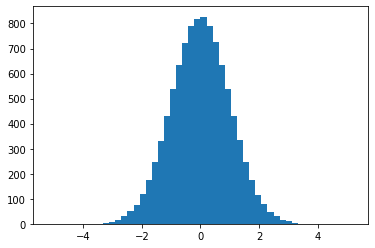

In [15]:
i=0
X_g = kde.pipe_[0].transform(data)
plt.hist(X_g[:, i], bins=50)

(array([  3.,   2.,   7.,   8.,  14.,   6.,  17.,  18.,  36.,  55.,  52.,
         88., 116., 126., 198., 221., 254., 321., 372., 421., 485., 531.,
        553., 582., 593., 558., 551., 532., 540., 481., 394., 358., 311.,
        263., 240., 185., 129.,  91.,  79.,  69.,  37.,  30.,  26.,  14.,
         14.,   8.,   5.,   2.,   2.,   2.]),
 array([-3.64675699, -3.50036209, -3.35396719, -3.20757229, -3.06117739,
        -2.91478249, -2.76838759, -2.62199269, -2.47559779, -2.32920289,
        -2.18280799, -2.03641309, -1.89001819, -1.74362329, -1.59722839,
        -1.45083349, -1.30443859, -1.15804369, -1.01164879, -0.86525389,
        -0.71885899, -0.57246409, -0.42606919, -0.27967429, -0.13327939,
         0.01311551,  0.15951041,  0.30590531,  0.45230021,  0.59869511,
         0.74509001,  0.89148491,  1.03787981,  1.18427471,  1.3306696 ,
         1.4770645 ,  1.6234594 ,  1.7698543 ,  1.9162492 ,  2.0626441 ,
         2.209039  ,  2.3554339 ,  2.5018288 ,  2.6482237 ,  2.7946186 ,
 

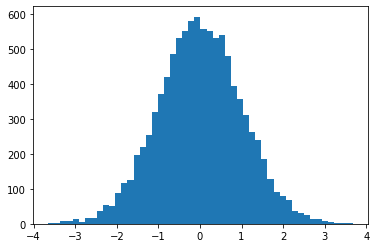

In [16]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 0], bins=50)

(array([  1.,   0.,   2.,   2.,   3.,   5.,  11.,  16.,  25.,  47.,  67.,
         79., 122., 159., 230., 299., 330., 446., 495., 599., 646., 674.,
        677., 716., 682., 649., 583., 534., 415., 350., 285., 243., 196.,
        130.,  95.,  64.,  49.,  34.,  18.,   9.,   5.,   3.,   1.,   2.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-4.03269477, -3.85809677, -3.68349878, -3.50890078, -3.33430279,
        -3.1597048 , -2.9851068 , -2.81050881, -2.63591081, -2.46131282,
        -2.28671482, -2.11211683, -1.93751884, -1.76292084, -1.58832285,
        -1.41372485, -1.23912686, -1.06452887, -0.88993087, -0.71533288,
        -0.54073488, -0.36613689, -0.19153889, -0.0169409 ,  0.15765709,
         0.33225509,  0.50685308,  0.68145108,  0.85604907,  1.03064707,
         1.20524506,  1.37984305,  1.55444105,  1.72903904,  1.90363704,
         2.07823503,  2.25283303,  2.42743102,  2.60202901,  2.77662701,
         2.951225  ,  3.125823  ,  3.30042099,  3.47501899,  3.64961698,
 

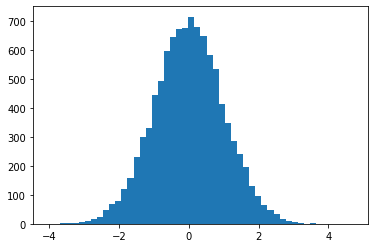

In [17]:
X_p = kde.pipe_[0:2].transform(data)
plt.hist(X_p[:, 1], bins=50)

(array([200., 200., 199., 200., 200., 201., 201., 198., 198., 200., 203.,
        199., 202., 198., 200., 203., 197., 204., 198., 198., 201., 200.,
        199., 200., 202., 198., 199., 202., 202., 196., 203., 198., 204.,
        197., 204., 196., 202., 199., 196., 203., 199., 204., 196., 203.,
        201., 200., 198., 199., 201., 199.]),
 array([3.74482238e-08, 2.00000367e-02, 4.00000360e-02, 6.00000352e-02,
        8.00000345e-02, 1.00000034e-01, 1.20000033e-01, 1.40000032e-01,
        1.60000031e-01, 1.80000031e-01, 2.00000030e-01, 2.20000029e-01,
        2.40000028e-01, 2.60000028e-01, 2.80000027e-01, 3.00000026e-01,
        3.20000025e-01, 3.40000025e-01, 3.60000024e-01, 3.80000023e-01,
        4.00000022e-01, 4.20000022e-01, 4.40000021e-01, 4.60000020e-01,
        4.80000019e-01, 5.00000019e-01, 5.20000018e-01, 5.40000017e-01,
        5.60000016e-01, 5.80000016e-01, 6.00000015e-01, 6.20000014e-01,
        6.40000013e-01, 6.60000013e-01, 6.80000012e-01, 7.00000011e-01,
        7.

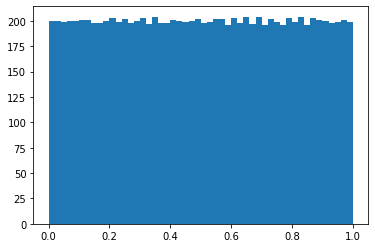

In [18]:
X_u = kde.pipe_.transform(data)
plt.hist(X_u[:, 1], bins=50)

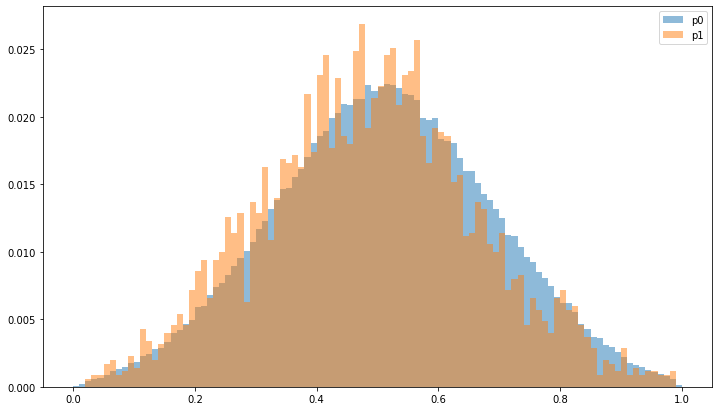

INFO:KDECopulaNNPdf:Maximum weight found: 2.0120723713916235


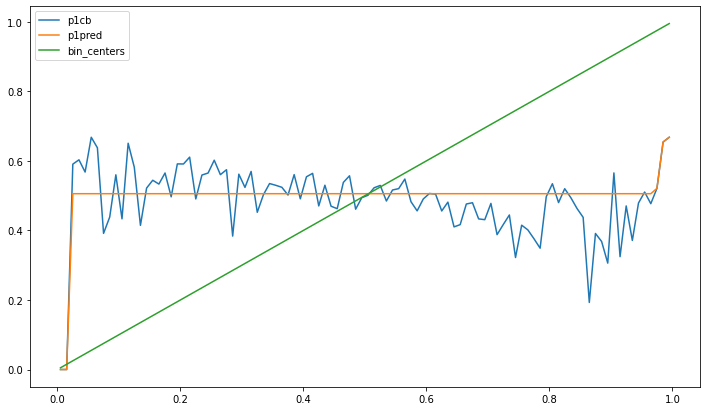

In [19]:
kde._calibrate_classifier(kde.hist_p0_, kde.hist_p1_, kde.bin_edges_, validation_plots=True)

In [20]:
X_gen, sample_weight = kde.sample(200000)

In [21]:
sum(sample_weight)

204647.82416772842

(array([5.90000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.99659e+05, 0.00000e+00, 1.66000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 9.90000e+01, 0.00000e+00, 1.70000e+01]),
 array([0.        , 0.04024145, 0.08048289, 0.12072434, 0.16096579,
        0.20120724, 0.24144869, 0.28169012, 0.32193157, 0.36217302,
        0.40241447, 0.44265592, 0.48289737, 0.5231388 , 0.56338024,
        0.6036217 , 0.64386314, 0.68410456, 0.72434604, 0.764587

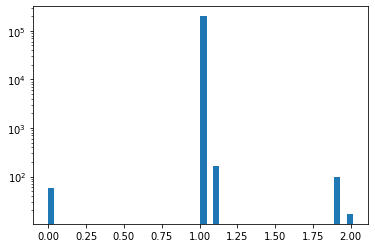

In [22]:
plt.hist(sample_weight, bins=50, log=True)

(array([0.   , 0.   , 0.   , 0.006, 0.015, 0.043, 0.127, 0.188, 0.291,
        0.348, 0.4  , 0.284, 0.181, 0.1  , 0.037, 0.023, 0.005, 0.002,
        0.001, 0.   , 0.   , 0.   , 0.   , 0.005, 0.019, 0.044, 0.121,
        0.192, 0.28 , 0.361, 0.356, 0.27 , 0.186, 0.109, 0.037, 0.024,
        0.008, 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.001, 0.014,
        0.053, 0.105, 0.177, 0.266, 0.337, 0.339, 0.287, 0.192, 0.113,
        0.045, 0.024, 0.002, 0.002, 0.002, 0.001, 0.   , 0.   , 0.001,
        0.009, 0.017, 0.043, 0.105, 0.201, 0.269, 0.344, 0.327, 0.26 ,
        0.2  , 0.116, 0.046, 0.016, 0.008, 0.001, 0.   , 0.   , 0.   ,
        0.   , 0.004, 0.009, 0.021, 0.046, 0.103, 0.172, 0.29 , 0.354,
        0.374, 0.284, 0.199, 0.087, 0.038, 0.019, 0.007, 0.003, 0.001,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

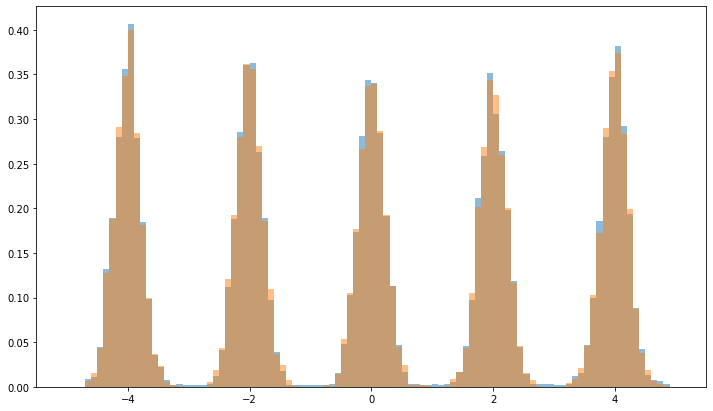

In [23]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

(array([0.   , 0.   , 0.001, 0.008, 0.016, 0.043, 0.117, 0.196, 0.299,
        0.35 , 0.367, 0.276, 0.192, 0.109, 0.047, 0.018, 0.008, 0.001,
        0.001, 0.   , 0.   , 0.   , 0.002, 0.003, 0.014, 0.044, 0.11 ,
        0.195, 0.28 , 0.371, 0.349, 0.29 , 0.181, 0.102, 0.042, 0.017,
        0.002, 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.003, 0.022,
        0.043, 0.107, 0.175, 0.296, 0.344, 0.341, 0.275, 0.193, 0.103,
        0.048, 0.02 , 0.005, 0.001, 0.001, 0.   , 0.   , 0.002, 0.   ,
        0.007, 0.02 , 0.053, 0.089, 0.181, 0.299, 0.326, 0.341, 0.285,
        0.185, 0.115, 0.059, 0.015, 0.002, 0.004, 0.   , 0.   , 0.   ,
        0.   , 0.001, 0.008, 0.032, 0.042, 0.112, 0.196, 0.274, 0.348,
        0.357, 0.282, 0.158, 0.111, 0.041, 0.019, 0.004, 0.001, 0.   ,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

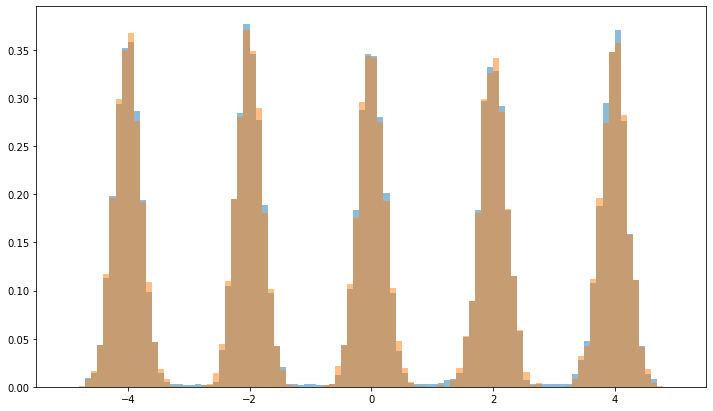

In [24]:
i=1
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5, weights=sample_weight)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

In [25]:
X_gen, sample_weight = kde.sample(data.shape[0])

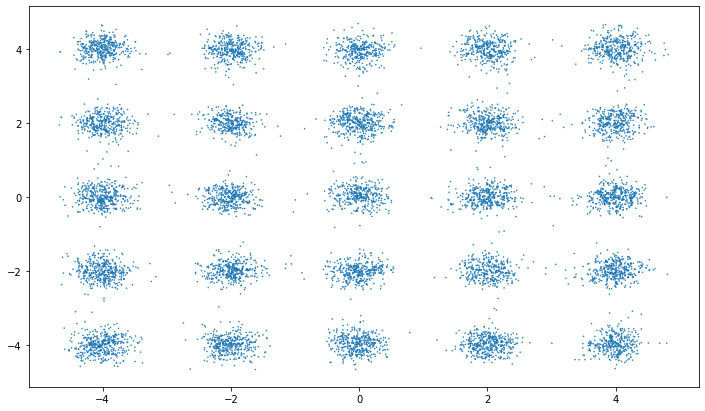

In [26]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.3*sample_weight)

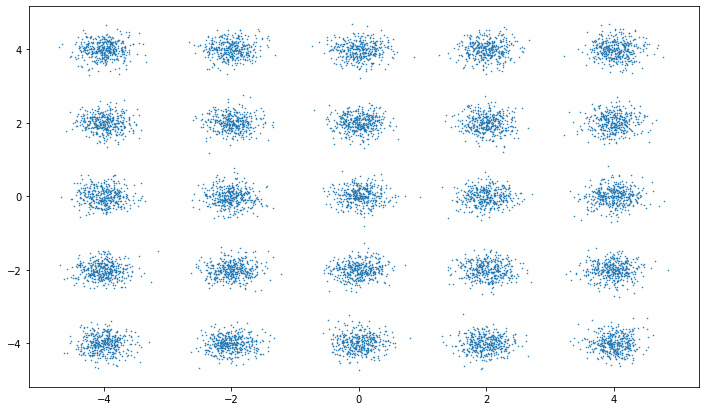

In [27]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(data[:,i], data[:,j], s=0.3)

In [28]:
X_gen = kde.sample_no_weights(200000)

In [29]:
len (X_gen)

109888

(array([0.   , 0.   , 0.   , 0.006, 0.015, 0.043, 0.127, 0.188, 0.291,
        0.348, 0.4  , 0.284, 0.181, 0.1  , 0.037, 0.023, 0.005, 0.002,
        0.001, 0.   , 0.   , 0.   , 0.   , 0.005, 0.019, 0.044, 0.121,
        0.192, 0.28 , 0.361, 0.356, 0.27 , 0.186, 0.109, 0.037, 0.024,
        0.008, 0.001, 0.   , 0.   , 0.   , 0.   , 0.002, 0.001, 0.014,
        0.053, 0.105, 0.177, 0.266, 0.337, 0.339, 0.287, 0.192, 0.113,
        0.045, 0.024, 0.002, 0.002, 0.002, 0.001, 0.   , 0.   , 0.001,
        0.009, 0.017, 0.043, 0.105, 0.201, 0.269, 0.344, 0.327, 0.26 ,
        0.2  , 0.116, 0.046, 0.016, 0.008, 0.001, 0.   , 0.   , 0.   ,
        0.   , 0.004, 0.009, 0.021, 0.046, 0.103, 0.172, 0.29 , 0.354,
        0.374, 0.284, 0.199, 0.087, 0.038, 0.019, 0.007, 0.003, 0.001,
        0.   ]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

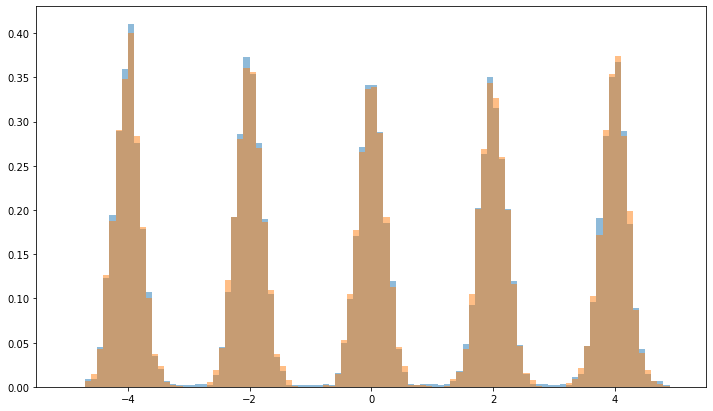

In [30]:
i=0
plt.figure(figsize=(12, 7))
plt.hist(X_gen[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)
plt.hist(data[:, i], bins=100, range=(-5,5), density=True, alpha=0.5)

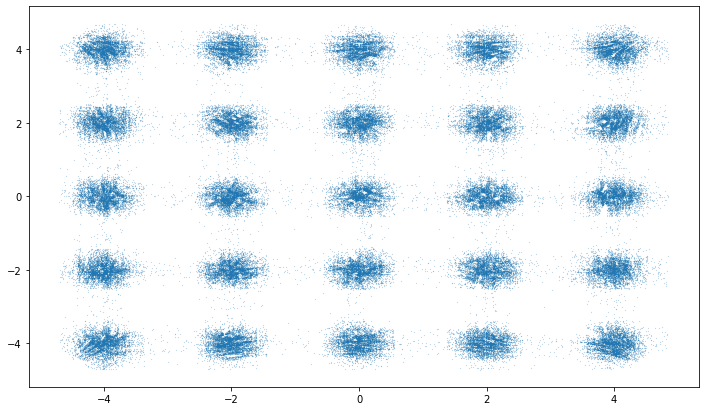

In [31]:
i=0
j=1
plt.figure(figsize=(12,7))
plt.scatter(X_gen[:,i], X_gen[:,j], s=0.01)

## run sdgym

In [32]:
import sdgym

In [33]:
def KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns):
    # assert len(categorical_columns + ordinal_columns) <= 1

    all_features = list(range(real_data.shape[1]))
    numerical_features = list(set(all_features) - set(categorical_columns + ordinal_columns))
    data = np.float64(real_data)
    
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        reg_lambda=1,
        gamma=0,
        max_depth=9
    )
#     clf = MLPClassifier(alpha=0.1, random_state=0, max_iter=1000, early_stopping=True)
    
    kde = KDECopulaNNPdf(
        use_KDE=False, 
        distinct_threshold=-1,
        n_uniform_bins=50,
    )
    kde = kde.fit(data)
    
    X_gen = kde.sample_no_weights(n_samples, show_progress=True)    
    X_gen = np.float32(X_gen)
    
    print(X_gen[:, :5])

    return X_gen

In [34]:
from sdgym.synthesizers import (
    CLBNSynthesizer, CTGANSynthesizer, IdentitySynthesizer, IndependentSynthesizer,
    MedganSynthesizer, PrivBNSynthesizer, TableganSynthesizer, TVAESynthesizer,
    UniformSynthesizer, VEEGANSynthesizer, CopulaGAN)

all_synthesizers = [
#    IdentitySynthesizer,
#     IndependentSynthesizer,
     KDECopulaNNPdf_Synthesizer,
#    CopulaGAN
#     KDECopulaNNPdf_SynthesizerInteger,
]

In [35]:
scores = sdgym.run(synthesizers=all_synthesizers, datasets=[dataset_name], iterations=1)

INFO:sdgym.benchmark:0%|          | 0/1 [00:00<?, ?it/s]
INFO:sdgym.benchmark:Evaluating KDECopulaNNPdf_Synthesizer on dataset grid; iteration 0; 330.89 MB
INFO:sdgym.data:Loading dataset grid (all variables, -1 distinct values threshold)
INFO:sdgym.data:Columns to zero-code: []
INFO:sdgym.benchmark:Running KDECopulaNNPdf_Synthesizer on dataset grid; iteration 0; 330.18 MB
INFO:KDECopulaNNPdf:Processing 2 numerical and 0 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.

Generating for node: 0: 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 2 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 2.0120723713916235
INFO:KDECopulaNNPdf:Generating 11696 data points.

Generating for node: 0: 100%|██████████| 2/2 [

[[ 1.9842519 -1.8622007]
 [-3.5439627 -3.7492259]
 [-1.7524098 -2.0454576]
 ...
 [ 2.1476178  2.066833 ]
 [-1.7992923 -4.1116276]
 [ 3.8268304  1.8217663]]


INFO:sdgym.evaluate:Evaluating using GaussianMixture(covariance_type='diag', n_components=30)
INFO:sdgym.benchmark:Finished KDECopulaNNPdf_Synthesizer on dataset grid; iteration 0; 348.01 MB
INFO:sdgym.benchmark:100%|##########| 1/1 [00:03<00:00,  3.61s/it]


In [36]:
scores

,grid/syn_likelihood,grid/test_likelihood,timestamp
VEEGANSynthesizer,-8.646858,-423.573276,2020-04-12 09:41:35.096775
CLBNSynthesizer,-3.883164,-9.202144,2020-10-17 09:46:54.494331
CTGAN,-8.760635,-5.062972,2020-10-17 09:46:54.494331
CTGANSynthesizer,-8.918386,-5.088557,2020-10-17 09:46:54.494331
CopulaGAN,-8.190169,-5.141363,2020-10-17 09:46:54.494331
GaussianCopulaCategorical,-7.235399,-4.511049,2020-10-17 09:46:54.494331
GaussianCopulaCategoricalFuzzy,-7.344126,-4.565754,2020-10-17 09:46:54.494331
GaussianCopulaOneHot,-7.268047,-4.514381,2020-10-17 09:46:54.494331
IdentitySynthesizer,-3.469963,-3.485827,2020-10-17 09:46:54.494331
IndependentSynthesizer,-3.468037,-3.485766,2020-10-17 09:46:54.494331
